In [2]:
# Compilation
# uncomment the line above if you want to run this script directly
# !make

# uncomment the following lines to use the virtual environment
# !source ./venv/bin/activate
# !pip install -e .

#### Imports and constants

In [8]:
import sys
import os
import numpy as np
from pathlib import Path
from scientific_toolbox.ode import ODEAnalysis, load_tests_from_csv, ForwardEulerSolver, ExplicitMidpointSolver, RK4Solver, compute_error, ODETestCase

ROOT_DIR = os.path.join(Path().absolute(), '..','..')
DATA_DIR = os.path.join(ROOT_DIR,'data')
OUTPUT_DIR = os.path.join(ROOT_DIR, 'output/ODE_Module/Analysis')

data_path = os.path.join(DATA_DIR, 'ode_tests.csv') # path to the data file, change it to your data file

### Load data from CSV
You can load data from a csv file using the load_tests_from_csv method, 

In [4]:

data = load_tests_from_csv(data_path)

Attempting to load tests from: /home/andrea/Scrivania/units/Advanced Programming/Assignments/homework_2/demos/notebooks/../../data/ode_tests.csv
Found 6 test cases in file

Successfully loaded 6 test cases


#### Define Analyzer
We provide an ODEAnalysis class which implements three main methods:

- ```py
  plot_solution(self, sol, title=None, save_path=None, show=True)
  ```
  This method plots the solution y(t) of the ODE problem. 
  - `sol` is an `ODESolution` type, returned by a `ODESolver` class
  - `title` is the title of the plot
  - `save_path` is the dir path where to save output plot, if None, no plots are saved
  - `show` whether to show the plots
- ```py
  compare_solvers(self, data, solvers=None, save_path=None, show=True)
  ```
  This method compares different solver methods on the same ODE problem.
  - `data` is an `ODETestCase` containing problem parameters 
  - `solvers` is a list of solver classes to compare (default: Forward Euler, Explicit Midpoint, RK4)
  - `save_path` is the dir path where to save output plot, if None, no plots are saved
  - `show` whether to show the plots

- ```py
  compare_cpp_py(self, data)
  ```
  This method compares performance between C++ and Python implementations.
  - `data` is a list of `ODETestCase` containing problem parameters (expr, y0, t0, tf, h)


In [5]:
analyzer = ODEAnalysis()

### Compare solvers

Solving ['-y1', '-y2', '-y3'] with ForwardEulerSolver...
Elapsed time: 0.000694 s
Solving ['-y1', '-y2', '-y3'] with RK4Solver...
Elapsed time: 0.000880 s
Solving ['-y1', '-y2', '-y3'] with ExplicitMidpointSolver...
Elapsed time: 0.000476 s


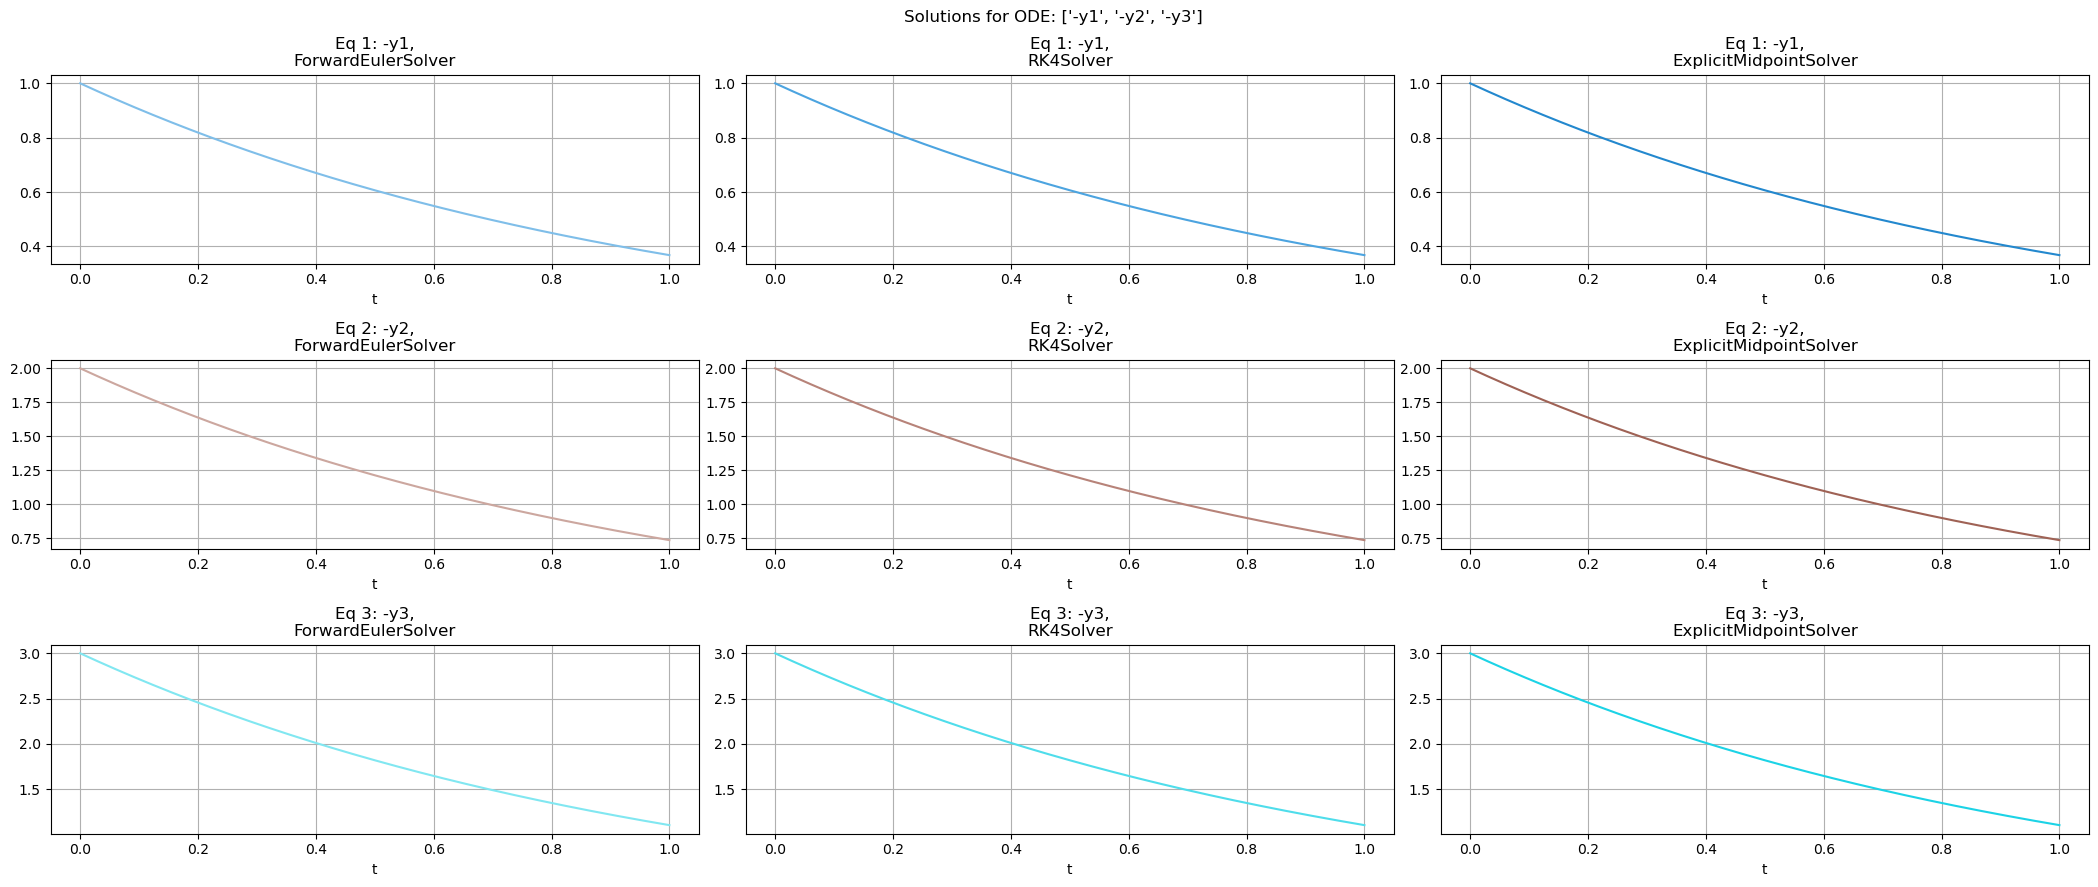

In [6]:
# plot solutions from different solvers
analyzer.compare_solvers(data[5], save_path = os.path.join(OUTPUT_DIR, ""), show = True)

### **Predator-Prey model over different methods**

In [26]:
expr = ["0.1 * y1 - 0.02 * y1 * y2","-0.3 * y2 + 0.01 * y1 * y2"]
y0 = np.array([50.0, 20.0])
real_solution = [35.8857, 22.7193]
pp_example = ODETestCase(expr, y0, 0, 1, 0.001, None, None)

#### Forward Euler

Predator-Prey model - Euler
ODE Test Case:
  Expression        :	[0.1 * y1 - 0.02 * y1 * y2, -0.3 * y2 + 0.01 * y1 * y2]
  Time interval     :	[0, 1]
  Step size         :	0.001
  y(0)              :	[50, 20]

solution: 	[35.88424362 22.72057212]
expected value:	[35.8857, 22.7193]
error:		0.0019337392052926092


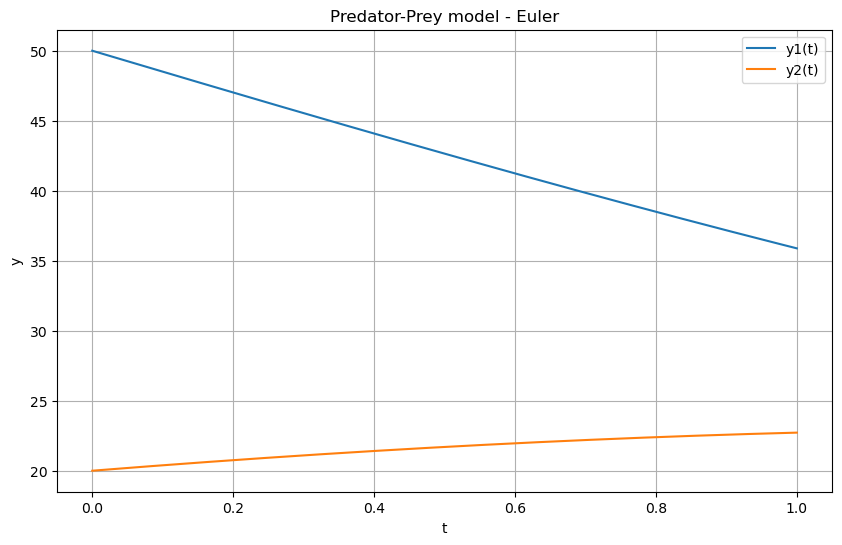

In [40]:
print("Predator-Prey model - Euler")
print(pp_example) # print the ODE test case details
euler = ForwardEulerSolver(pp_example)
euler_solution = euler.solve()
print(f"solution: \t{euler_solution.get_result()}\nexpected value:\t{real_solution}\nerror:\t\t{compute_error(euler_solution.get_result(), real_solution)}")
analyzer.plot_solution(euler_solution, title = "Predator-Prey model - Euler", save_path = os.path.join(OUTPUT_DIR, "pp_euler"), show = True)

### Explicit Midpoint

Predator-Prey model - Explicit Midpoint
ODE Test Case:
  Expression        :	[0.1 * y1 - 0.02 * y1 * y2, -0.3 * y2 + 0.01 * y1 * y2]
  Time interval     :	[0, 1]
  Step size         :	0.001
  y(0)              :	[50, 20]

solution:	[35.88569933 22.71930101]
expected value:	[35.8857, 22.7193]
error: 		1.2115269473527039e-06


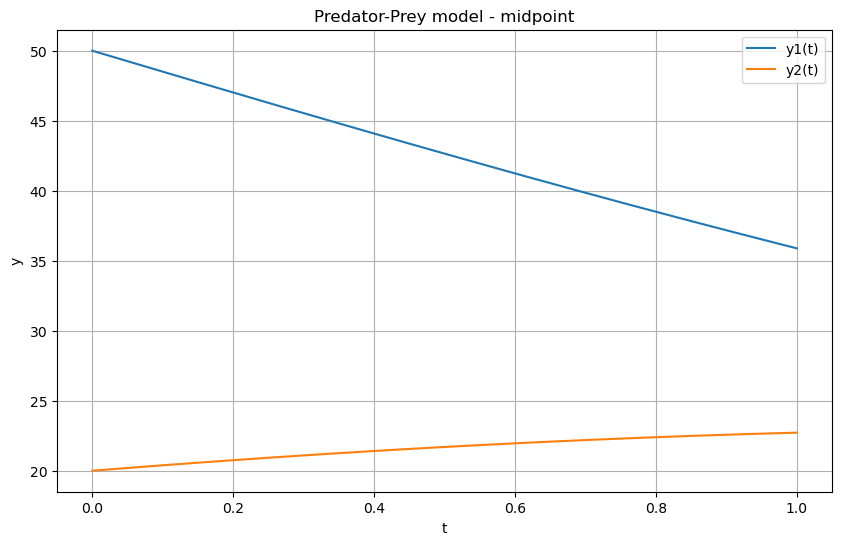

In [42]:
print("Predator-Prey model - Explicit Midpoint")
print(pp_example) # print the ODE test case details
midpoint = ExplicitMidpointSolver(pp_example)
midpoint_solution = midpoint.solve()
print(f"solution:\t{midpoint_solution.get_result()}\nexpected value:\t{real_solution}\nerror: \t\t{compute_error(midpoint_solution.get_result(), real_solution)}")
analyzer.plot_solution(midpoint_solution, title = "Predator-Prey model - midpoint", save_path =  os.path.join(OUTPUT_DIR, "pp_midpoint"), show = True)

### Runge Kutta 4

Predator-Prey model - Runge-Kutta 4
ODE Test Case:
  Expression        :	[0.1 * y1 - 0.02 * y1 * y2, -0.3 * y2 + 0.01 * y1 * y2]
  Time interval     :	[0, 1]
  Step size         :	0.001
  y(0)              :	[50, 20]

solution	: [35.8856996  22.71930104]
expected value:	[35.8857, 22.7193]
error: 		1.117720577346971e-06


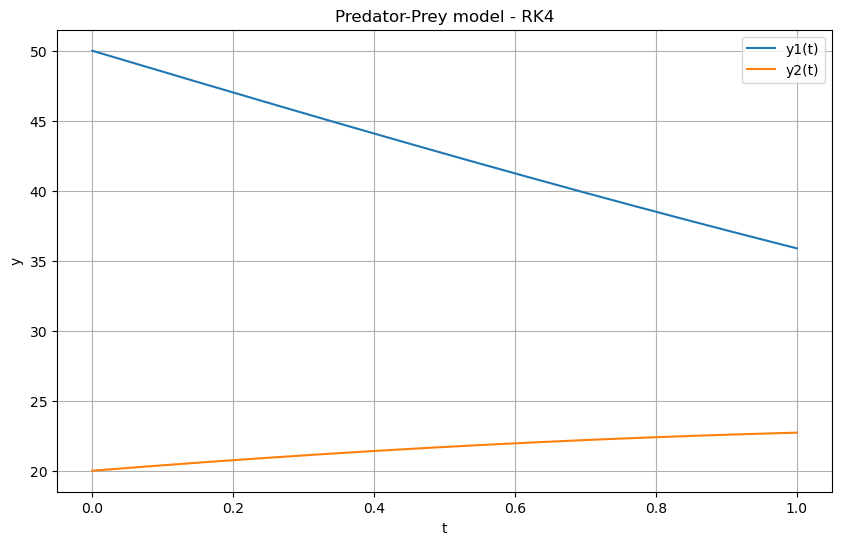

In [45]:
print("Predator-Prey model - Runge-Kutta 4")
print(pp_example) # print the ODE test case details
rk4 = RK4Solver(pp_example)
rk4_solution = rk4.solve()
print(f"solution\t: {rk4_solution.get_result()}\nexpected value:\t{real_solution}\nerror: \t\t{compute_error(rk4_solution.get_result(), real_solution)}")
analyzer.plot_solution(rk4_solution, title = "Predator-Prey model - RK4", save_path = os.path.join(OUTPUT_DIR, "pp_rk4"), show = True)

### C++ binding vs `scipy.integrate`

In [46]:
analyzer.compare_cpp_py(data)

Solving y * t with ForwardEulerSolver...
Expected solution: 1.64872127
C++:
	result:	1.6476230382011234,
	error:	0.001098231798876581
	time:	8.4661e-05
Py:
	result:	1.648310728684026,
	error:	0.00041054131597406673
	time:	0.001938521

Solving y * t with ExplicitMidpointSolver...
Expected solution: 1.64872127
C++:
	result:	1.6487209960918527,
	error:	2.739081472746818e-07
	time:	8.6294e-05
Py:
	result:	1.648310728684026,
	error:	0.00041054131597406673
	time:	0.00197466

Solving y * t with RK4Solver...
Expected solution: 1.64872127
C++:
	result:	1.6487212707001242,
	error:	7.001241808524128e-10
	time:	0.000149374
Py:
	result:	1.6488312274116605,
	error:	0.00010995741166053286
	time:	0.000750976

Solving -y with ForwardEulerSolver...
Expected solution: 0.367879441
C++:
	result:	0.36769542477096373,
	error:	0.00018401622903624348
	time:	5.6317e-05
Py:
	result:	0.3670900359760259,
	error:	0.0007894050239740658
	time:	0.000561437

Solving -y with ExplicitMidpointSolver...
Expected solution: 